# Homework 6: Hypothesis Testing, P-Hacking, and Simple Linear Regression 
***

**Name**: 

**Section**: (001 or 002)
***

This assignment is due on Moodle by **5pm on Friday December 1st**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [6]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

### [15 points] Problem 1 - Hypothesis Testing: Find-the-Knowledge-Bug 
***

As part of your job as a seasoned data science consultant, companies often bring you in to supervise their less-experienced data science teams before new product roll-outs.  One one such occasion, you are hired by a medium-sized internet-sales company that is preparing to release a new line of smart-home products.  Prior to their product release the company wants to do a targeted ad campaign to drive traffic to their site on launch day. 

You are asked to pair-up and do some inference work with a new employee named Stevey McKnowsNoStats. At various points in your day you catch Stevey making the following mistakes.  In each case, clearly explain to Stevey why his testing setup or conclusion is incorrect. 

**Part A**: Stevey has pulled up some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the mean age of customers that visit the site.  Let $X$ be the random variable describing the age of a site visitor and suppose that the population mean for $X$ is $\mu$. In particular, Stevey wants to see if the data suggests that the mean age of their customers is under 30 years old.   He decides to perform the test with a null hypothesis of $H_0: \bar{x} = 30$. 

#### Solutions
The null hypothesis made there is wrong, 抽样样本的均值$\bar{x}$是已知的,并不需要被检验! 我们这里需要对样本总体分布均值$u$进行假设检验!

**Part B**: After the wonderful explanation you gave him after the previous debacle, Stevey has seen the error in his ways and decides instead to do his hypothesis test with a null hypothesis of $H_0: \mu < 30$.  

#### Solutions
由于后续在计算检验统计量(test statistic)的时候,需要建立在null hypothesis成立的情况下,因此,null hypothesis一般包含了等号.lesson17中讲到了"The equals sign is always in the Null hypothesis", "The alternative hypothesis is the one for which we are seeking statistical evidence". 对于null hypothesis,正确的写法应该是: $H_0: \mu = 30$

**Part C**: Finally on track with reasonable hypotheses of $H_0: \mu = 30$ and $H_1: \mu < 30$, Stevey computes a normalized test-statistic of $z = -1.35$ for the mean age and concludes that since $z = -1.35 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ significance level that the mean age of their customers is less than 30.  

#### Solutions
这里,$z$的含义是test statistic, 而不是概率, 不能与$\alpha=0.05$直接做比较. 如果想要比较的话, 需要计算出当$z=-1.35$是对应的p-value. 经过计算可知,当$z=-1.35$时,p-value等于0.089, 由于0.089大于0.05, 因此statistical evidence不足, 不能证明访客的平均年龄小于30岁.

**Part D**: This time, with the hypotheses again $H_0: \mu = 30$ and $H_1: \mu < 30$, Stevey computes a p-value of $0.03$, and thus concludes that there is only a 3% probability that the null hypothesis is true. 

#### Solutions
lesson18中提到了"The p-value is NOT the probability that the Null is true!!", 因此上面的表述是错误的! p-value虽然是个概率,但是它衡量了test statistic的extremeness!!

### [10 points] Problem 2 - Scientists vs. P-Values 
***

Read the following article from **FiveThirtyEight**: [Statisticians Found One Thing They Can Agree On: It's Time to Stop Misusing P-Values](http://fivethirtyeight.com/features/statisticians-found-one-thing-they-can-agree-on-its-time-to-stop-misusing-p-values/). In what ways are scientists misusing p-values?  What suggestions are being made to use them properly? 

#### Solutions
Misusing p-values
1. Using p-values to tell if the hypothesis is correct;
2. Using p-values to tell you the probability that a result occurred by chance;
3. Using p-values to tell you the size of an effect, the strength of the evidence or importance of a result.

Suggestions:
1. Using confidence intervals or Bayesian analyses to replace the p-values
2. Move toward a greater acceptance of uncertainty

### [20 points] Problem 3 - Evaluating Pizza Delivery Performance 
***

The manager of a pizza chain with multiple locations likes to keep meticulous data on his pizza deliveries.  The data from more than 1200 deliveries in May 2014 is stored in pizza.csv. Load this data into a Pandas DataFrame. 

**Part A**: The manager's goal is to have an average delivery time across all branches of less than 30 minutes.  Perform an appropriate hypothesis test at the $\alpha=0.05$ significance level to evaluate whether this goal has been achieved.  Be sure to clearly state your null and alternate hypothesis, describe your testing procedure, and show all calculations in Python. 

#### Solutions
首先,写出null hypothesis和alter hypothesis, 如下所示:
$$H_0: \mu=30$$ 
$$H_1: \mu < 30$$

In [7]:
### pizza data
data = pd.read_csv('./data/pizza.csv')

### 
def hypoth_test_z(data, mu):
    n = len(data)
    mean = np.mean(data)
    std  = np.std(data)
    z = (mean - mu) / np.sqrt(std**2/n)
    return z

###
alpha = .05
z = hypoth_test_z(data['time'].values, 30)
z_alpha = stats.norm.ppf(alpha)
print('z: ', z)
print('z_alpha', z_alpha)

z:  -3.17246094167
z_alpha -1.64485362695


由上面可知,计算得到的test statistic $z=-3.17$, 这个值小于z_alpha=-1.64,位于拒绝域中,因此可以reject $H_0$

**Part B**: The manager also has the goal of having an average delivery temperature across all branches of greater than 65F.  Perform an appropriate hypothesis test at the $\alpha=0.05$ significance level to evaluate whether this goal has been achieved.  Be sure to clearly state your null and alternate hypothesis, describe your testing procedure, and show all calculations in Python. 

#### Solutions
首先,写出null hypothesis和alter hypothesis, 如下所示:
$$H_0: \mu=65$$ 
$$H_1: \mu > 65$$

In [8]:
###
alpha = .05
z = hypoth_test_z(data['temperature'].values, 65)
z_alpha = stats.norm.ppf(1 - alpha)
print('z: ', z)
print('z_alpha', z_alpha)

z:  1.38263482068
z_alpha 1.64485362695


由上面可知,计算得到的test statistic $z=1.38$, 这个值小于z_alpha=1.64,位于接受域中,因此不能reject $H_0$

**Part C**: The manager has enough money to give one of his delivery drivers a raise based on good performance. He knows from the data that his two best drivers are Mario and Luigi, but he's not sure if there is evidence that either one is better than the other.  Using delivery time and temperature as the criteria, perform any necessary hypothesis tests at the $\alpha = 0.05$ significance level, to determine if one of the drivers deserves a raise. Be sure to clearly describe your hypotheses and methodology, and show any relevant computations in Python. 

**Part D**: On the other hand, the manager suspects that Salvatore has been underperforming as a driver.  The manager has a policy that if a pizza takes 40 minutes or longer to be delivered, he has to fork over a free bottle of wine.  This policy is only financially viable for the pizza chain if they have give out free wine on less than 5% of all pizza deliveries.  Perform a hypothesis test at the $\alpha = 0.05$ significance level to determine if there is significant evidence that the proportion of Salvatore's deliveries that take longer than 40 minutes is greater than 5%.  

### [15 points] Problem 4 - Naps vs Coffee for Memory? 
***

The consumption of coffee to benefit alertness is a common activity practiced by 90% of adults in North America. Often coffee is used to replace the need for sleep. One recent study compares students’ ability to recall memorized information after either the consumption of coffee or a brief nap. A random sample of 24 adults
were randomly divided into two groups and verbally given a list
of 25 words to memorize. During a break, one of the groups took a nap for an hour and a half,
another group stayed awake and were given a coffee an hour prior to testing. Researchers measured the number of words participants were
able to recall following the break. The summary statistics for the two groups are shown below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Nap} & 12 & 15.5 & 3.2 \\ 
\textrm{Coffee} & 12 & 12.25 & 3.1 \\ 
\end{array}
$$

In previous experiments the mean recall measurement was found to be normally distributed. 

**Part A**: Compute a 95% t-confidence interval for the mean recall measurement for participants that took a nap before the test. Do all computations in Python. 

In [9]:
### For participant that took a nap before the test
alpha = 1 - .95
n     = 12
mean  = 15.5
std   = 3.2
t_alpha = stats.t.ppf(1-alpha/2, n-1)

half_CI = t_alpha * std / np.sqrt(n)

print('A 95% t-confidence interval for the mean recall is [', mean-half_CI, ' ', mean+half_CI, ']')

A 95% t-confidence interval for the mean recall is [ 13.4668170005   17.5331829995 ]


**Part B**: Is there sufficient evidence, at the $\alpha = 0.5$ significance level, to conclude that taking a nap promotes better memory recall that drinking coffee?  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python. 

#### solutions
u1: mean recall measurement for participants that took a nap before the test

u2: mean recall measurement for participants that took a coffee before the test

Hypotheses:
$$ H_0: u1 = u2$$
$$ H_1: u1 > u2$$

In [10]:
n1 = 12
n2 = 12
mean1 = 15.50
mean2 = 12.25
std1 = 3.2
std2 = 3.1

t = (mean1-mean2)/np.sqrt(std1**2/n1+std2**2/n2)
t_alpha = stats.t.ppf(1-alpha, n1-1)

print('t: ',t)
print('t_alpha: ', t_alpha)

t:  2.52693300826
t_alpha:  1.7958848187


由上可知,test statistic$t=2.53$大于$t\_alpha=1.80$, 因此, 可以reject $H_0$

**Part C**: Compute a 95% confidence interval for the standard deviation of memory recall for coffee drinkers. Do all computations in Python.  

In [11]:
### Compute a 95% confidence interval for the standard deviation 
# of memory recall for coffee drinkers.
alpha = 1 - .95
n     = 12
s_square = 3.1**2

CI_low  = np.sqrt((n-1) * s_square / (stats.chi2.ppf(1-alpha/2,n-1)**2))
CI_high = np.sqrt((n-1) * s_square / (stats.chi2.ppf(alpha/2,n-1)**2))
print('CI: [%.2f, %.2f]'%(CI_low, CI_high))

CI: [0.47, 2.69]


### [20 points] Problem 5 - Bad Science for Fun and Profit 
***

[Data Dredging](https://en.wikipedia.org/wiki/Data_dredging) and [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant) are umbrella terms for the dangerous practice of automatically testing a large number of hypotheses on the entirety or subsets of a single dataset in order to find statistically significant results. In this exercise we will focus on the idea of testing hypotheses on subsets of a single data set.  

Johnny Nefarious has landed his first data science internship at an online marketing firm.  His primary summer project has been to design and test a new email advertisement for his company's best-selling product. To test his advertisement his supervisors have allowed him to send his ad to 4 targeted customer groups of 50 people every day for a month. 

The effectiveness of online advertising is typically measured by the ad's [click-through rate](https://en.wikipedia.org/wiki/Click-through_rate) (CTR), which is defined to be the _proportion_ of users that click on an advertisement. The company's standard email advertisement has a CTR of $0.05$.  Johnny is hoping to land a permanent position at the company when he graduates, so he's **really** motivated to show his supervisors that the CTR of his email advertisement is a (statistically) significant improvement over their previous ad. 

The data from Johnny's summer experiment can be found in email.csv. Load this dataset into Pandas. 

In [12]:
### Load the data
data = pd.read_csv('./data/email.csv')

**Part A**: State the null and alternate hypotheses that Johnny should test to see if his ad campaign is an improvement over the company's standard mailer with a CTR of $0.05$. 

#### solutions
设定CTR为$\mu$
$$H_0: \mu = 0.05$$
$$H_1: \mu > 0.05$$

**Part B**: Test the hypothesis from **Part A** at the $\alpha = 0.05$ significance level using a p-value test. Is there sufficient evidence for Johnny to conclude that his ad campaign is an improvement?   

In [13]:
# Using fun defined in Problem 3 Part A
# def hypoth_test_z(data, mu):
z = hypoth_test_z(data=(data['Clicked'] / data['Sent']).values, mu=0.05)
p_value = 1 - stats.norm.cdf(z)
print('p_value: ', p_value)

p_value:  0.222474032731


由上可知,p_value的值为0.222,大于alpha=0.05,因此不能reject $H_0$

**Part C**: Bummer, Johnny thinks. This is the part where he decides to resort to some questionable science.  Maybe there is a reasonable subset of the data for which his alternative hypothesis is supported?  Can he find it?  Can he come up for a reasonable justification for why this subset of the data should be considered while the rest should be discarded? 

Here are the **rules**: Johnny cannot modify the original data (e.g. by adding nonexistent clicks to certain groups or days) because his boss will surely notice.  Instead he needs to find a subset of the data for which his hypothesis is supported by a p-value test at the $\alpha = 0.05$ significance level _and_ be able to explain to his supervisors why his sub-selection of the data is reasonable.  

In addition to your explanation of why your successful subset of the data is potentially reasonable, be sure to thoroughly explain the details of the tests that you perform and show all of your Python computation.  

### [20 points] Problem 6 - Simple Linear Regression for Gas Mileage 
***

The data in auto.csv contains information on cars from the 1970s and 1980s. In this exercise you will construct a simple linear regression model for the response variable mpg with horsepower as the feature. Load the data into a Pandas DataFrame.    


In [14]:
# Load the data
data = pd.read_csv('./data/auto.csv')

**Part A**: Perform a simple linear regression with horsepower as the feature and mpg as the response.  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

In [30]:
# 
x = data['horsepower'].values
y = data['mpg'].values

mean_x = np.mean(x)
mean_y = np.mean(y)

beta_H = np.sum((x-mean_x)*(y-mean_y))
beta_L = np.sum((x-mean_x)**2)

beta = beta_H / beta_L
alpha = mean_y - beta * mean_x
print('Model is: Y = %.2f + (%.2fx)'%(alpha, beta))

Model is: Y = 39.94 + (-0.16x)


**Part B**: Make a scatter-plot of the data with horsepower as the feature and mpg as the response and overlay the estimated regression line. 


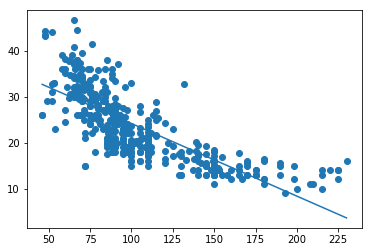

In [31]:
plt.scatter(x,y)
xx = np.linspace(x.min(),x.max())
yy = alpha + beta * xx
plt.plot(xx,yy)
plt.show()

**Part C**: Is the relationship between horsepower and mpg positive or negative? Justify your response. 

由图中可以看出,斜率小于0,因此自变量和因变量之间的关系是负相关!!!

**Part D**: Find a 95% confidence interval for the slope parameter.  Based on this confidence interval, is there sufficient evidence to believe, at the 95% confidence level, that there is a real relationship between horsepower and mpg? 

In [32]:
###
n = x.shape[0]
alpha_t = stats.t.cdf(0.05/2, n-2)
new_y = alpha + beta * x
SSE = np.sum((y-new_y)**2)
sigma_square = SSE / (n-2)
SE = np.sqrt(sigma_square) / np.sqrt(np.sum((x-mean_x)**2))
print('Confidence interval: [%.2f, %.2f]'%(beta-alpha_t*SE, beta+alpha_t*SE))

Confidence interval: [-0.16, -0.15]


由上面可以看出,斜率参数的95%置信区间为[-0.16, -0.15],说明horsepower和mpg之间确实存在关系!

**Part E**: Double-check your result from **Part D** by performing an equivalent hypothesis test.  Be sure to state your null and alternative hypotheses and explain your general methodology.  Do your conclusions agree with those made in **Part D**? 

$$H_0: beta=-0.16$$
$$H_1: beta \neq -0.16$$

检验斜率beta=-0.16的假设是否成立!!

**Part F**: What gas mileage would your simple linear regression model predict for a car with a horsepower of $97$? 

In [33]:
# 
horsepower = 97
y = alpha + beta * horsepower
print('gas mileage is %.2f when horsepower is %d'%(y, horsepower))

gas mileage is 24.62 when horsepower is 97
